# 导包

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns

# 读取数据

In [2]:
# 数据读取
data = pd.read_csv("./车贷违约预测.csv",encoding = 'gb18030')
data.head()

,客户编号,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,601758,65532,78990,84.38,136,20490,45,1981,2018,8,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,519488,56759,65325,89.55,61,22778,86,1967,2018,6,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,447579,58413,67960,89.02,5,15663,86,1977,2018,9,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,648134,72317,99750,73.68,76,17242,48,1995,2018,8,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,458210,50078,65450,79.45,146,14181,45,1974,2018,17,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1


In [93]:
data.describe()

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
count,199717.000000,1.997170e+05,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.0,199717.000000,199717.000000,...,1.997170e+05,1.997170e+05,1.997170e+05,1.997170e+05,199717.00,1.997170e+05,1.997170e+05,1.997170e+05,199717.000000,199717.000000
mean,54256.272280,7.582391e+04,74.643960,72.698508,19634.049665,69.085766,1983.876921,2018.0,7.245222,1547.857919,...,1.743125e+05,2.299233e+05,2.294165e+05,1.344553e+04,inf,5.059582e+04,2.928000e+03,5.535709e+02,1.438913,0.487475
std,12977.656996,1.892894e+04,11.490485,69.706185,3493.655400,22.128288,9.805565,0.0,4.481338,974.901476,...,9.813640e+05,2.530977e+06,2.534185e+06,1.531618e+05,NaN,2.275670e+06,1.065410e+05,1.141343e+05,0.792213,0.561915
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1949.000000,2018.0,1.000000,1.000000,...,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,-110000.33,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,46977.000000,6.571400e+04,68.730000,14.000000,16505.000000,48.000000,1977.000000,2018.0,4.000000,712.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000
50%,53703.000000,7.092200e+04,76.670000,61.000000,20333.000000,86.000000,1986.000000,2018.0,6.000000,1449.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000
75%,60247.000000,7.915900e+04,83.590000,130.000000,23000.000000,86.000000,1992.000000,2018.0,10.000000,2357.000000,...,3.818900e+04,6.720600e+04,6.508500e+04,2.094000e+03,1.26,2.500000e+01,0.000000e+00,1.000000e+00,1.670000,1.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,2000.000000,2018.0,22.000000,3795.000000,...,9.652492e+07,1.000000e+09,1.000000e+09,2.564281e+07,inf,1.000000e+09,1.980000e+07,5.000000e+07,18.000000,2.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199717 entries, 0 to 199716
Data columns (total 48 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   已发货款            199717 non-null  int64  
 1   资产成本            199717 non-null  int64  
 2   贷款与资产比列         199717 non-null  float64
 3   品牌              199717 non-null  int64  
 4   骑车销售商           199717 non-null  int64  
 5   车厂              199717 non-null  int64  
 6   出生日期            199717 non-null  int64  
 7   货款日期            199717 non-null  int64  
 8   地区              199717 non-null  int64  
 9   对接员工编号          199717 non-null  int64  
 10  是否填写手机号         199717 non-null  int64  
 11  受否填写身份证         199717 non-null  int64  
 12  是否出具驾驶证         199717 non-null  int64  
 13  是否填写护照          199717 non-null  int64  
 14  信用评分            199717 non-null  int64  
 15  主账户贷款次数         199717 non-null  int64  
 16  主账户有效贷款次数       199717 non-null  int64  
 17  主账户中尚未还清有效

In [97]:
# 重复值计算
data.duplicated().sum()

118

In [102]:
# 删除重复行
data = data.drop_duplicates()

In [103]:
# 再次检查重复值
data.duplicated().sum()

0

# 选择变量

In [146]:
# 因为汽车销售商、车厂等数据比较繁杂，剔除
# 贷款日期与是否违约相关性也不高，剔除
# 对接员工编号，与违约相关性不高，剔除
# 是否填写手机号、是否填写身份证、是否出具驾驶证、是否填写护照，等相关性均不大，剔除
# 已发贷款 = 资产成本 * 贷款与资产比例 因此，三者对因变量相关性是一致，保留“资产成本”数据
# 简化模型，剔除次账户的贷款信息
# 保留以下字段进行分析
data_analysis = ['资产成本','品牌','地区','信用评分','主账户有效贷款次数','主账户中已发放贷款',
                '近六个月新贷款次数','近六个月违约次数','平均贷款期限',
                '贷款总次数','已发放贷款总额','每月还款总额','贷款与已还贷款比列','工作类型']

In [149]:
# 分类型列
fenlei = ['品牌','地区','工作类型']

# 计数型列
jishu = ['主账户有效贷款次数','近六个月新贷款次数', '近六个月违约次数','平均贷款期限','贷款总次数']

# 连续型列
lianxu = ['资产成本','信用评分','主账户中已发放贷款','已发放贷款总额','每月还款总额','贷款与已还贷款比列']
          
# 属性
y_value = ['是否违约']

In [148]:
# 是否违约分布情况
data.是否违约.value_counts()

0    164192
1     35407
Name: 是否违约, dtype: int64

## 品牌相关性分析

In [121]:
data["品牌"].value_counts().describe()

count       82.000000
mean      2434.134146
std       2305.821708
min         53.000000
25%        736.000000
50%       1636.500000
75%       3498.250000
max      11318.000000
Name: 品牌, dtype: float64

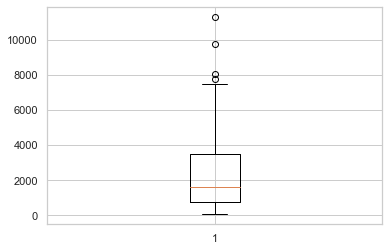

In [130]:
plt.boxplot(data["品牌"].value_counts())
plt.show()

In [139]:
# 把品牌次数低于200的归类到'others'
tops = data["品牌"].value_counts()[data["品牌"].value_counts()>200].index

In [140]:
data.品牌[~data.品牌.isin(tops)] = "others"

In [142]:
crosstable = pd.crosstab(data.是否违约,data.品牌)
stats.chi2_contingency(crosstable)
# p值等于0.0，说明拒绝原假设，品牌与是否违约有相关性

(2163.0806209075304,
 0.0,
 77,
 array([[4078.49706662, 9310.29241629, 6611.31119895, 6407.30408469,
         2287.67655149, 2285.20872349, 1780.12659382, 2865.97091168,
         3196.65986303, 2076.26595324, 1104.76433249, 2144.54252777,
         4484.86607648,  825.07715971, 3528.1714237 , 4150.06407848,
         3138.25460047, 1100.65128583, 5544.38689573,  476.29080306,
         6134.19778656, 1906.8084309 ,  419.53075917, 3318.40604412,
         3470.58877048,  482.04906838, 1400.9036919 , 1143.42697108,
         2448.9079805 ,  217.16886357, 8028.66707749, 1624.65343013,
          574.18131353, 1243.78530955,  910.6285302 , 1012.63208734,
         3000.05623275,  604.61785881, 1025.79383664, 1522.649873  ,
         2411.06795124,  731.29969589, 1291.49665078,  269.8158608 ,
          245.13758085,  259.12193949, 2740.93429326, 1171.39568836,
         1692.10739533,  393.20726056, 2935.89270487,  627.65092009,
          753.51014785, 2284.38611416, 5525.4668811 , 3056.81627663,
  

## 地区相关性分析

In [150]:
data["地区"].value_counts().describe()

count       22.000000
mean      9072.681818
std      10414.580847
min         63.000000
25%       3192.000000
50%       5227.500000
75%      11287.500000
max      38441.000000
Name: 地区, dtype: float64

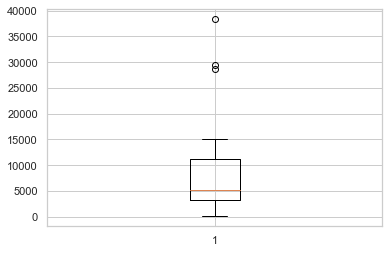

In [151]:
plt.boxplot(data["地区"].value_counts())
plt.show()

In [161]:
area_tops = data["地区"].value_counts()[data["地区"].value_counts()<1000].index
data.地区[~data.地区.isin(area_tops)] = "others"

In [162]:
area_cross = pd.crosstab(data.是否违约,data.地区)
stats.chi2_contingency(area_cross)
# p值0.089 > α值 = 0.05, 因此不能拒绝原假设

(8.049214280765623,
 0.08979195725810483,
 4,
 array([[7.31299696e+02, 1.34907930e+02, 1.07761822e+02, 5.18243879e+01,
         1.63166206e+05],
        [1.57700304e+02, 2.90920696e+01, 2.32381775e+01, 1.11756121e+01,
         3.51857938e+04]]))

## 工作类型相关性分析

In [163]:
data["工作类型"].value_counts().describe()

count         3.000000
mean      66533.000000
std       53373.559943
min        6577.000000
25%       45365.500000
50%       84154.000000
75%       96511.000000
max      108868.000000
Name: 工作类型, dtype: float64

In [164]:
work_cross = pd.crosstab(data.是否违约,data.工作类型)
stats.chi2_contingency(work_cross)
# p值小于0.05，拒绝原假设，具有相关性

(147.51476594464302,
 9.280589759805786e-33,
 2,
 array([[89555.83272461, 69225.86570073,  5410.30157466],
        [19312.16727539, 14928.13429927,  1166.69842534]]))

## 异常值处理

主账户有效贷款次数
count    199599.000000
mean          1.049033
std           1.951428
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         144.000000
Name: 主账户有效贷款次数, dtype: float64
Ttest_indResult(statistic=-17.100977602776034, pvalue=1.6253805488785266e-65)


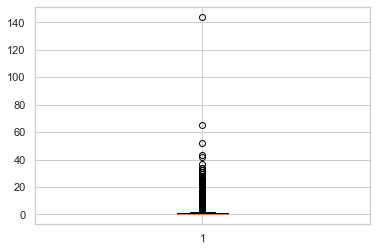

------------------
近六个月新贷款次数
count    199599.000000
mean          0.385298
std           0.957576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          35.000000
Name: 近六个月新贷款次数, dtype: float64
Ttest_indResult(statistic=-12.195101171665131, pvalue=3.394875676038921e-34)


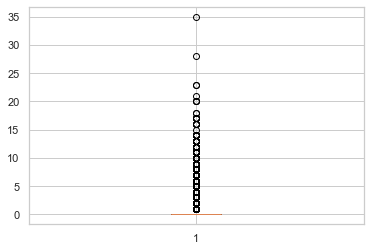

------------------
近六个月违约次数
count    199599.000000
mean          0.096013
std           0.381041
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: 近六个月违约次数, dtype: float64
Ttest_indResult(statistic=14.562325616539495, pvalue=5.162114455452662e-48)


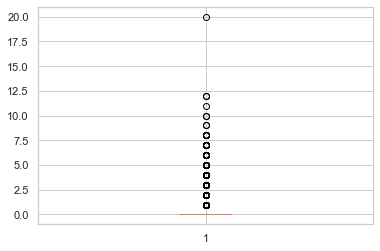

------------------
平均贷款期限
count    199599.000000
mean          8.062871
std          13.863472
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         117.000000
Name: 平均贷款期限, dtype: float64
Ttest_indResult(statistic=-10.197960115351442, pvalue=2.0529437054494805e-24)


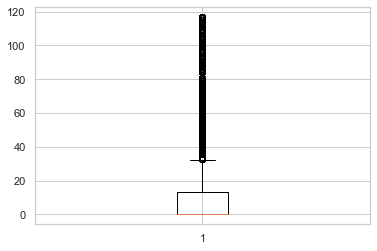

------------------
贷款总次数
count    199599.000000
mean          2.525053
std           5.357297
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         453.000000
Name: 贷款总次数, dtype: float64
Ttest_indResult(statistic=-14.481580025651635, pvalue=1.6746598917903763e-47)


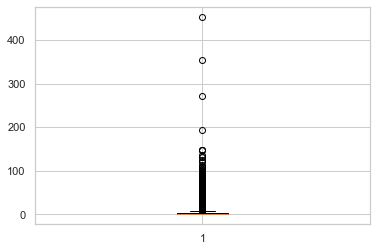

------------------


In [169]:
for i in jishu:
    print("{i}".format(i=i))
    print(data[i].describe())
    ttest = stats.ttest_ind(data[i][data.是否违约==1],data[i][data.是否违约==0])
    print(ttest)
    plt.boxplot(data[i])
    plt.show()
    print("------------------")

In [181]:
drop_index = data['主账户有效贷款次数'][data['主账户有效贷款次数']>30].index
drop_index

Int64Index([  1590,  48482,  60298,  67718,  80744,  85553,  95556, 140189,
            142062, 148358, 149421, 184004],
           dtype='int64')

In [184]:
data = data.drop(drop_index)
data
# 删除主账户有效贷款次数>30的行

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


In [191]:
data = data.drop(data['近六个月新贷款次数'][data['近六个月新贷款次数']>15].index)
data
# 删除近6个月新贷款次数>15的行

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


In [198]:
data = data.drop(data['近六个月违约次数'][data['近六个月违约次数']>=10].index)
data
# 删除近6个月违约次数大于等于10的行

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


In [208]:
data = data.drop(data['贷款总次数'][data['贷款总次数']>100].index)
data
# 删除贷款总次数大于100的行

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


主账户有效贷款次数
count    199549.000000
mean          1.044125
std           1.893583
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          28.000000
Name: 主账户有效贷款次数, dtype: float64
Ttest_indResult(statistic=-17.495560473792427, pvalue=1.7428426839925083e-68)


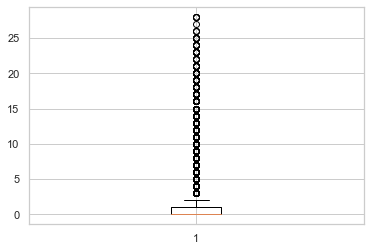

------------------
近六个月新贷款次数
count    199549.000000
mean          0.382808
std           0.934841
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: 近六个月新贷款次数, dtype: float64
Ttest_indResult(statistic=-12.512667650593357, pvalue=6.565984035011545e-36)


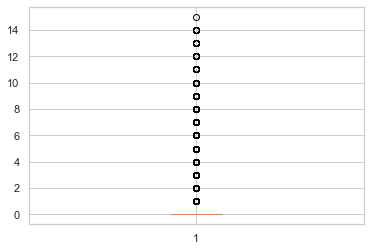

------------------
近六个月违约次数
count    199549.000000
mean          0.095420
std           0.373169
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: 近六个月违约次数, dtype: float64
Ttest_indResult(statistic=14.792084389455804, pvalue=1.750445402379188e-49)


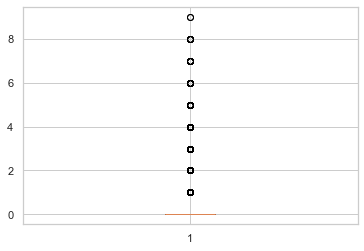

------------------
平均贷款期限
count    199549.000000
mean          8.062280
std          13.863563
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         117.000000
Name: 平均贷款期限, dtype: float64
Ttest_indResult(statistic=-10.184690227667845, pvalue=2.3530750753851745e-24)


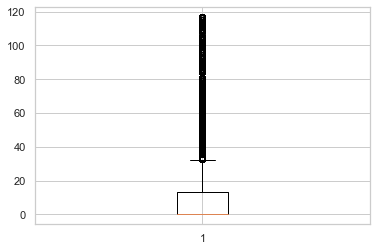

------------------
贷款总次数
count    199549.000000
mean          2.503360
std           5.013654
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          99.000000
Name: 贷款总次数, dtype: float64
Ttest_indResult(statistic=-15.882509265806952, pvalue=9.076135978498663e-57)


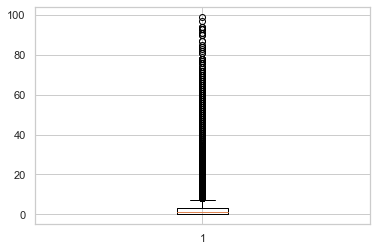

------------------


In [209]:
# 对计数类型数据进行t独立样本检验
for i in jishu:
    print("{i}".format(i=i))
    print(data[i].describe())
    ttest = stats.ttest_ind(data[i][data.是否违约==1],data[i][data.是否违约==0])
    print(ttest)
    plt.boxplot(data[i])
    plt.show()
    print("------------------")

# 各样本的t检验p值均小于0.05，拒绝原假设，对是否违约有显著性影响

资产成本
count    1.995490e+05
mean     7.582732e+04
std      1.892970e+04
min      3.700000e+04
25%      6.571800e+04
50%      7.092300e+04
75%      7.916000e+04
max      1.628992e+06
Name: 资产成本, dtype: float64
Ttest_indResult(statistic=5.038484140012173, pvalue=4.6964170440520844e-07)


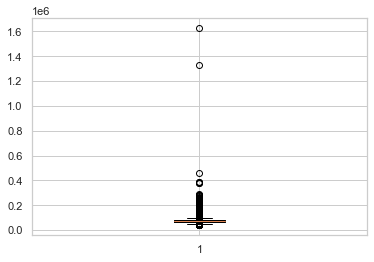

------------------
信用评分
count    199549.000000
mean        291.890263
std         339.356996
min           0.000000
25%           0.000000
50%          14.000000
75%         680.000000
max         890.000000
Name: 信用评分, dtype: float64
Ttest_indResult(statistic=-23.990259167446197, pvalue=5.325463345778775e-127)


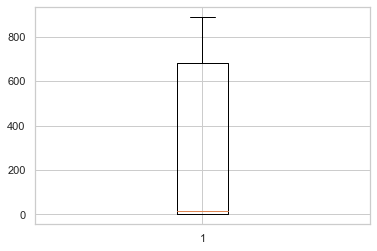

------------------
主账户中已发放贷款
count    1.995490e+05
mean     2.189689e+05
std      2.487314e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.200000e+04
max      1.000000e+09
Name: 主账户中已发放贷款, dtype: float64
Ttest_indResult(statistic=-3.8547759517846467, pvalue=0.00011587192837098492)


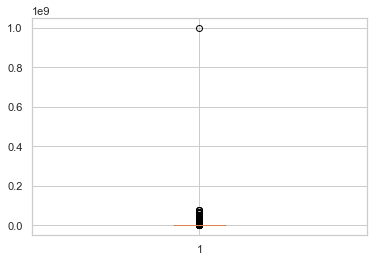

------------------
已发放贷款总额
count    1.995490e+05
mean     2.262023e+05
std      2.495101e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.503300e+04
max      1.000000e+09
Name: 已发放贷款总额, dtype: float64
Ttest_indResult(statistic=-4.008770342176866, pvalue=6.105789636762263e-05)


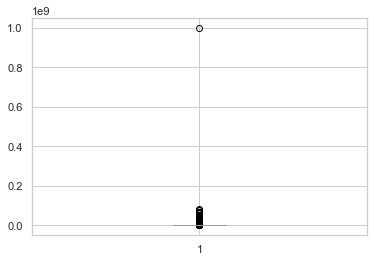

------------------
每月还款总额
count    1.995490e+05
mean     1.335547e+04
std      1.522124e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.095000e+03
max      2.564281e+07
Name: 每月还款总额, dtype: float64
Ttest_indResult(statistic=-4.9042592405369625, pvalue=9.385412219797146e-07)


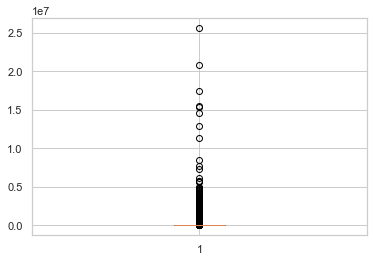

------------------
贷款与已还贷款比列
count    199549.00
mean           inf
std            NaN
min     -110000.33
25%           1.00
50%           1.00
75%           1.27
max            inf
Name: 贷款与已还贷款比列, dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)


/Users/zhouhan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/zhouhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:5346: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2


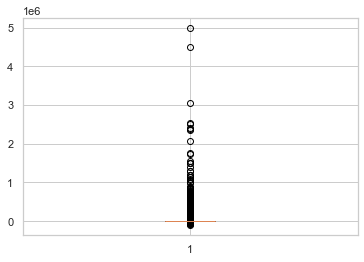

------------------


In [210]:
for i in lianxu:
    print("{i}".format(i=i))
    print(data[i].describe())
    ttest = stats.ttest_ind(data[i][data.是否违约==1],data[i][data.是否违约==0])
    print(ttest)
    plt.boxplot(data[i])
    plt.show()
    print("------------------")

In [215]:
data = data.drop(data['资产成本'][data['资产成本']>=0.4e6].index)
data
# 删除资产成本三个极端值

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


In [216]:
data = data.drop(data['主账户中已发放贷款'][data['主账户中已发放贷款']>=0.8e9].index)
data
# 删除主账户中已发放贷款极端值

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


In [218]:
data = data.drop(data['每月还款总额'][data['每月还款总额']>=1e7].index)
data
# 删除每月还款总款极端值

,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,对接员工编号,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,65532,78990,84.38,136,20490,45,1981,2018,others,2801,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,56759,65325,89.55,61,22778,86,1967,2018,others,3060,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,58413,67960,89.02,5,15663,86,1977,2018,others,1032,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,72317,99750,73.68,76,17242,48,1995,2018,others,220,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,50078,65450,79.45,146,14181,45,1974,2018,others,1828,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,36439,60424,62.89,10,23507,45,1986,2018,others,121,...,592668,525000,525000,0,0.89,525000,0,1.0,3.00,0
199713,52303,72677,72.93,34,15142,86,1985,2018,others,1641,...,0,0,0,0,1.00,0,0,1.0,1.00,0
199714,54413,62710,89.30,67,16565,45,1973,2018,others,1071,...,1185601,1220000,1220000,2500,1.03,487,0,1.0,3.00,1
199715,54509,71921,77.86,74,16846,45,1983,2018,others,306,...,0,0,0,0,1.00,0,0,1.0,1.00,1


资产成本
count    199537.000000
mean      75811.705694
std       18375.286831
min       37000.000000
25%       65718.000000
50%       70923.000000
75%       79159.000000
max      388025.000000
Name: 资产成本, dtype: float64
Ttest_indResult(statistic=5.374577160557898, pvalue=7.684837784721624e-08)


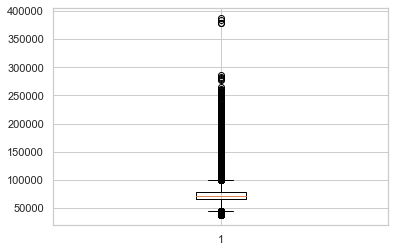

------------------
信用评分
count    199537.000000
mean        291.880754
std         339.360992
min           0.000000
25%           0.000000
50%          14.000000
75%         680.000000
max         890.000000
Name: 信用评分, dtype: float64
Ttest_indResult(statistic=-23.998058316693502, pvalue=4.4176418720351006e-127)


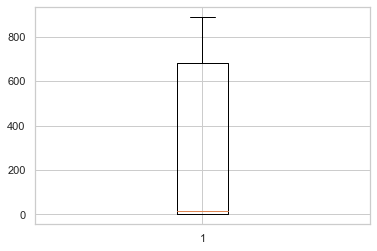

------------------
主账户中已发放贷款
count    1.995370e+05
mean     2.136640e+05
std      1.083690e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.200000e+04
max      8.034917e+07
Name: 主账户中已发放贷款, dtype: float64
Ttest_indResult(statistic=-13.27294186331993, pvalue=3.4559484778431057e-40)


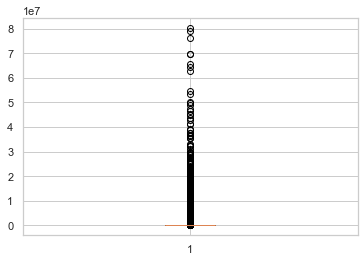

------------------
已发放贷款总额
count    1.995370e+05
mean     2.208919e+05
std      1.101430e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.500000e+04
max      8.126467e+07
Name: 已发放贷款总额, dtype: float64
Ttest_indResult(statistic=-13.434378486628729, pvalue=3.9625605594210676e-41)


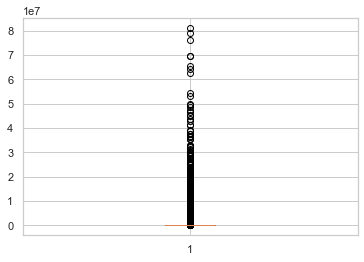

------------------
每月还款总额
count    1.995370e+05
mean     1.268681e+04
std      1.061668e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.094000e+03
max      8.470059e+06
Name: 每月还款总额, dtype: float64
Ttest_indResult(statistic=-7.198747778135212, pvalue=6.098066576275315e-13)


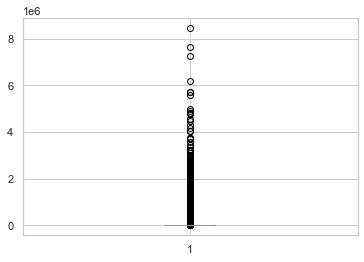

------------------
贷款与已还贷款比列
count    199537.00
mean           inf
std            NaN
min     -110000.33
25%           1.00
50%           1.00
75%           1.27
max            inf
Name: 贷款与已还贷款比列, dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)


/Users/zhouhan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/zhouhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:5346: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2


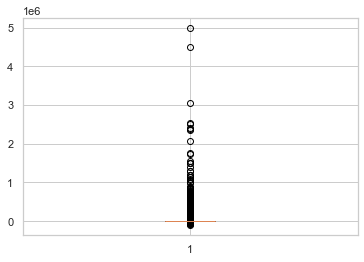

------------------


In [219]:
for i in lianxu:
    print("{i}".format(i=i))
    print(data[i].describe())
    ttest = stats.ttest_ind(data[i][data.是否违约==1],data[i][data.是否违约==0])
    print(ttest)
    plt.boxplot(data[i])
    plt.show()
    print("------------------")

# 缺失值查询

In [225]:
data.isnull().sum()

已发货款              0
资产成本              0
贷款与资产比列           0
品牌                0
骑车销售商             0
车厂                0
出生日期              0
货款日期              0
地区                0
对接员工编号            0
是否填写手机号           0
受否填写身份证           0
是否出具驾驶证           0
是否填写护照            0
信用评分              0
主账户贷款次数           0
主账户有效贷款次数         0
主账户中尚未还清有效贷款      0
主账户中已批准的贷款        0
主账户中已发放贷款         0
次账户贷款次数           0
次账户有效贷款次数         0
次账户中尚未还清有效贷款      0
次账户中已批准贷款         0
次账户中已发放贷款         0
主账户每月还款           0
次账户没用还款           0
近六个月新贷款次数         0
近六个月违约次数          0
平均贷款期限            0
第一次贷款距今时间         0
贷款查询次数            0
是否违约              0
贷款与资产比            0
贷款总次数             0
主账户无效贷款次数         0
次账户无效贷款次数         0
无效贷款总次数           0
尚未还清有效贷款总额        0
已批准贷款总额           0
已发放贷款总额           0
每月还款总额            0
贷款与已还贷款比列         0
主账户还款期数           0
次账户还款期数           0
贷款与已批准贷款比列        0
总贷款次数与总有效贷款次数比    0
工作类型              0
dtype: int64

# 自变量选择

In [14]:
# 分类型列
fenlei = ['品牌','工作类型']

# 计数型列
jishu = ['主账户有效贷款次数','近六个月新贷款次数', '近六个月违约次数','平均贷款期限','贷款总次数']

# 连续型列
lianxu = ['资产成本','信用评分','主账户中已发放贷款','已发放贷款总额','每月还款总额']
          
# 属性
y_value = ['是否违约']

In [220]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
select = SelectPercentile(percentile=70)
select.fit(data.iloc[:,4:].dropna(axis=1),data.selec是否违约)

In [ ]:
select.get_support() # 返回被选中特征和没被选中特征的掩码或者整数索引

In [ ]:
data.ilov[:,4:].dropna(axis=1).columns[select.get_support()]

In [223]:
from sklearn.feature_selection import f_classif, f_regression, chi2 # 方差，相关系数，卡方

In [ ]:
# stats.f_oneway(data.五年内信用不良事件数量[data.是否违约==1],data.五年内信用不良事件数量[data.是否违约==0])
# 方差分析的作用
# 方差齐性检验
# 回归中检验 方程有效性 H0 w1=w2=w3=0

In [ ]:
# 相关系数
data.rename()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimSun']
sns.heatmap(cor_mat, linewidths=0.2,vmax=1, vmin=-1, linecolor='w', annot=True, annot_kws=['size':8],square=True)

In [ ]:
# 方差扩大因子（variance inflation factor）简称VIF > 10 有多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
ll = list(map(lamda x: variance_inflation_factor(data_cor.values, x),range(data_cor.shape[1])))
ll 

In [ ]:
data.apply(lambda x: x.isna().sum()/x.size,axis=0)

# 变量衍生

In [227]:
data.columns

Index(['已发货款', '资产成本', '贷款与资产比列', '品牌', '骑车销售商', '车厂', '出生日期', '货款日期', '地区',
       '对接员工编号', '是否填写手机号', '受否填写身份证', '是否出具驾驶证', '是否填写护照', '信用评分', '主账户贷款次数',
       '主账户有效贷款次数', '主账户中尚未还清有效贷款', '主账户中已批准的贷款', '主账户中已发放贷款', '次账户贷款次数',
       '次账户有效贷款次数', '次账户中尚未还清有效贷款', '次账户中已批准贷款', '次账户中已发放贷款', '主账户每月还款',
       '次账户没用还款', '近六个月新贷款次数', '近六个月违约次数', '平均贷款期限', '第一次贷款距今时间', '贷款查询次数',
       '是否违约', '贷款与资产比', '贷款总次数', '主账户无效贷款次数', '次账户无效贷款次数', '无效贷款总次数',
       '尚未还清有效贷款总额', '已批准贷款总额', '已发放贷款总额', '每月还款总额', '贷款与已还贷款比列', '主账户还款期数',
       '次账户还款期数', '贷款与已批准贷款比列', '总贷款次数与总有效贷款次数比', '工作类型'],
      dtype='object')

In [309]:
# 近6月违约金额
data['近6月违约金额'] = data.每月还款总额 * data.近六个月违约次数
# 欠款占比
data['欠款占比'] = data.尚未还清有效贷款总额 / data.已发货款
data.欠款占比[data.欠款占比 == np.inf] = 0
data.欠款占比[data.欠款占比.isna()] = 0
# 账号有效贷款次数
data['账户有效贷款次数'] = data.主账户有效贷款次数 + data.次账户有效贷款次数
# 剩余还款期数
data['剩余还款期数'] = data.尚未还清有效贷款总额 / data.每月还款总额
data.剩余还款期数[data.剩余还款期数 == np.inf] = 0
data.剩余还款期数[data.剩余还款期数.isna()] = 0
# 每次贷款金额
data['每次贷款金额'] = data.资产成本 / data.账户有效贷款次数
data.每次贷款金额[data.每次贷款金额 == np.inf] = 0
data.每次贷款金额[data.每次贷款金额.isna()] = 0

In [231]:
data.columns

Index(['已发货款', '资产成本', '贷款与资产比列', '品牌', '骑车销售商', '车厂', '出生日期', '货款日期', '地区',
       '对接员工编号', '是否填写手机号', '受否填写身份证', '是否出具驾驶证', '是否填写护照', '信用评分', '主账户贷款次数',
       '主账户有效贷款次数', '主账户中尚未还清有效贷款', '主账户中已批准的贷款', '主账户中已发放贷款', '次账户贷款次数',
       '次账户有效贷款次数', '次账户中尚未还清有效贷款', '次账户中已批准贷款', '次账户中已发放贷款', '主账户每月还款',
       '次账户没用还款', '近六个月新贷款次数', '近六个月违约次数', '平均贷款期限', '第一次贷款距今时间', '贷款查询次数',
       '是否违约', '贷款与资产比', '贷款总次数', '主账户无效贷款次数', '次账户无效贷款次数', '无效贷款总次数',
       '尚未还清有效贷款总额', '已批准贷款总额', '已发放贷款总额', '每月还款总额', '贷款与已还贷款比列', '主账户还款期数',
       '次账户还款期数', '贷款与已批准贷款比列', '总贷款次数与总有效贷款次数比', '工作类型', '近6月违约金额', '欠款占比',
       '账户有效贷款次数', '剩余还款期数', '每次贷款金额'],
      dtype='object')

In [325]:
data_train_index = ['品牌','工作类型','主账户有效贷款次数','近六个月新贷款次数', '近六个月违约次数',
                    '平均贷款期限','贷款总次数','资产成本','信用评分','主账户中已发放贷款',
                    '已发放贷款总额','每月还款总额','近6月违约金额','欠款占比',
                    '账户有效贷款次数','每次贷款金额','是否违约']

In [326]:
data_train = data[data_train_index]
data_train

,品牌,工作类型,主账户有效贷款次数,近六个月新贷款次数,近六个月违约次数,平均贷款期限,贷款总次数,资产成本,信用评分,主账户中已发放贷款,已发放贷款总额,每月还款总额,近6月违约金额,欠款占比,账户有效贷款次数,每次贷款金额,是否违约
0,136,0,0,0,0,0,0,78990,0,0,0,0,0,0.000000,0,0.0,1
1,61,1,2,0,0,27,7,65325,300,2036500,2036500,34455,0,36.190542,2,32662.5,1
2,5,1,0,0,0,0,0,67960,0,0,0,0,0,0.000000,0,0.0,1
3,76,0,1,0,0,25,1,99750,763,13813,13813,0,0,0.000000,1,99750.0,1
4,146,1,1,0,1,4,16,65450,379,550000,550000,12863,12863,9.328667,1,65450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,10,0,2,0,0,53,2,60424,753,525000,525000,0,0,16.264661,2,30212.0,0
199713,34,0,0,0,0,0,0,72677,0,0,0,0,0,0.000000,0,0.0,0
199714,67,1,2,1,0,7,2,62710,771,1220000,1220000,2500,0,21.788929,2,31355.0,0
199715,74,1,0,0,0,0,0,71921,0,0,0,0,0,0.000000,0,0.0,0


In [240]:
data.是否违约.value_counts()
# 违约占17.7%，数据没有失衡 

0    164143
1     35394
Name: 是否违约, dtype: int64

In [234]:
35394/(164143+35394)

0.1773806361727399

In [236]:
import os
import time

# 模型处理模块
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 常规模型
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 集成学习和stacking模型
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from mlxtend.classifier import StackingClassifier
# 评价标准模块
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [330]:
for i in data_train.columns:
    print(i)
    data_train[i] = data_train[i].astype("float")
    print(np.isnan(data_train[i]).sum())
    print(np.isinf(data_train[i]).sum())

品牌
0
0
工作类型
0
0
主账户有效贷款次数
0
0
近六个月新贷款次数
0
0
近六个月违约次数
0
0
平均贷款期限
0
0
贷款总次数
0
0
资产成本
0
0
信用评分
0
0
主账户中已发放贷款
0
0
已发放贷款总额
0
0
每月还款总额
0
0
近6月违约金额
0
0
欠款占比
0
0
账户有效贷款次数
0
0
每次贷款金额
0
0
是否违约
0
0


In [331]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_train.iloc[:,:-1],data_train.是否违约,test_size=0.3)

In [332]:
def train_model(Xtrain,Xtest,Ytrain,Ytest,model,model_name):
    print('训练{}'.format(model_name))
    
    # 创建制定模型
    clf = model
    start = time.time()
    
    # 训练模型
    clf.fit(Xtrain,Ytrain.values.ravel())
    
    # 验证模型
    print("训练集评估")
    train_pre = clf.predict(Xtrain)
    print(classification_report(Ytrain,train_pre))
    
    print("检验集评估")
    test_pre = clf.predict(Xtest)
    print(classification_report(Ytest,test_pre))
    
    end = time.time()
    duration = end - start
    print('模型训练耗时:{:6f}s'.format(duration))
    
    return clf

In [333]:
model_name_param_dict = {'LR':(LogisticRegression()),
                         'DT':(DecisionTreeClassifier()),
                         'AdaBoost':(AdaBoostClassifier()),
                         'RF':(RandomForestClassifier()),
                         'XGBoost':(XGBClassifier())
                        }
result = {}
for model_name, model in model_name_param_dict.items():
    result[model_name] = train_model(Xtrain,Ytrain,Xtest,Ytest,model,model_name)

训练LR


ValueError: Found input variables with inconsistent numbers of samples: [139675, 957792]

# 数据清洗出现问题，提交作业来看答案